### Job India Survey

Columns <br>
Employment_Sector -> Choice Of Sector Of Employment <br>
Employment_Background -> Choice Of Background Of Employment <br>
Public_Dealing -> Would Public Dealing Be A Problem For You? <br>
Degree -> Are You Pursuing A Degree That Is Necessary For Your Ideal Choice Of Employment? <br>
IdealNumberOfWorkdays -> Ideal Number Of Work Days In A Week <br>
IdealYearlyIncome -> Ideal Yearly Income In Rupees

### Libraries 

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

### Read the file

In [32]:
job_india = pd.read_csv('jobsurveyindia.csv')
job_india = job_india.drop(columns=['Unnamed: 0'])
job_india.head()

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,Private Sector,Art,No,Yes,4.0,600K-900K
2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,Private Sector,Technical,No,Yes,5.0,1200K-1500K


### Add underscore for columns with a white space

In [33]:
i = 0
cols = [col for col in job_india.columns if ' ' in col]
for col in job_india.columns:
    if ' ' in col:
        col = col.replace(' ', '_')
        job_india = job_india.rename(columns={job_india.columns[i]: col})
    i+=1
    
job_india.columns

Index(['Employment_Sector', 'Employment_Background', 'Public_Dealing',
       'Degree', 'IdealNumberOfWorkdays', 'IdealYearlyIncome'],
      dtype='object')

### Survey data

In [34]:
job_india.head()

,Employment_Sector,Employment_Background,Public_Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,Private Sector,Art,No,Yes,4.0,600K-900K
2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,Private Sector,Technical,No,Yes,5.0,1200K-1500K


In [35]:
job_india.shape

(400, 6)

In [36]:
job_india.columns

Index(['Employment_Sector', 'Employment_Background', 'Public_Dealing',
       'Degree', 'IdealNumberOfWorkdays', 'IdealYearlyIncome'],
      dtype='object')

In [37]:
job_india.dtypes

Employment_Sector         object
Employment_Background     object
Public_Dealing            object
Degree                    object
IdealNumberOfWorkdays    float64
IdealYearlyIncome         object
dtype: object

In [38]:
for i in job_india.columns:
    print(f'{i}: {job_india[i].unique()}')

Employment_Sector: ['Private Sector' 'Government Sector' 'Entrepreneurship']
Employment_Background: ['Technical' 'Art ' 'Non-Technical' 'Art']
Public_Dealing: ['No' 'No ' 'Yes']
Degree: ['Yes' 'Yes ' 'No']
IdealNumberOfWorkdays: [4. 6. 5. 7.]
IdealYearlyIncome: ['More Than 1500K' '600K-900K' '900K-1200K' '1200K-1500K']


### Strip data

In [39]:
'''
    Another better solution: # job_india['Degree'] = job_india['Degree'].apply(lambda x: x.strip())
'''

def valueStrip(col_name):
    for col in col_name:
        job_india[col] = job_india[col].str.strip()

valueStrip(['Degree', 'Public_Dealing', 'Employment_Background'])

In [40]:
for i in job_india.columns:
    print(f'{i}: {job_india[i].unique()}')

Employment_Sector: ['Private Sector' 'Government Sector' 'Entrepreneurship']
Employment_Background: ['Technical' 'Art' 'Non-Technical']
Public_Dealing: ['No' 'Yes']
Degree: ['Yes' 'No']
IdealNumberOfWorkdays: [4. 6. 5. 7.]
IdealYearlyIncome: ['More Than 1500K' '600K-900K' '900K-1200K' '1200K-1500K']


### Check null

In [41]:
# Check null columns
job_india.isnull().any()

Employment_Sector        False
Employment_Background    False
Public_Dealing           False
Degree                   False
IdealNumberOfWorkdays    False
IdealYearlyIncome        False
dtype: bool

### Groupby and count

In [42]:
for i in job_india.columns:
    print(job_india.groupby([i])[i].count())
    print('')

Employment_Sector
Entrepreneurship      76
Government Sector    189
Private Sector       135
Name: Employment_Sector, dtype: int64

Employment_Background
Art               62
Non-Technical    222
Technical        116
Name: Employment_Background, dtype: int64

Public_Dealing
No     205
Yes    195
Name: Public_Dealing, dtype: int64

Degree
No     159
Yes    241
Name: Degree, dtype: int64

IdealNumberOfWorkdays
4.0    136
5.0    182
6.0     67
7.0     15
Name: IdealNumberOfWorkdays, dtype: int64

IdealYearlyIncome
1200K-1500K        102
600K-900K           65
900K-1200K         162
More Than 1500K     71
Name: IdealYearlyIncome, dtype: int64



### Data Visualization

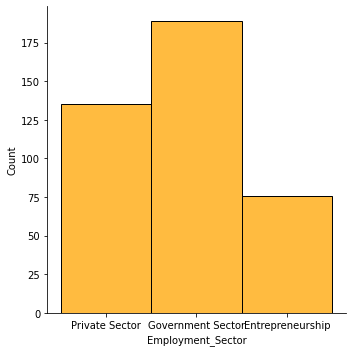

In [192]:
# Number of employment sector
sns.displot(data=job_india, x='Employment_Sector', color='orange', kde=False)

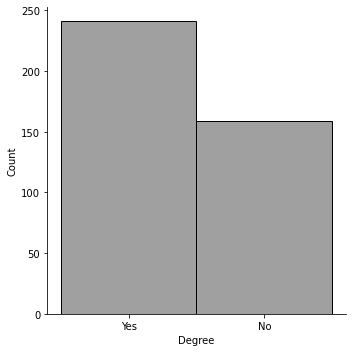

In [196]:
# Number of degree
sns.displot(data=job_india, x='Degree', color='grey')
# Most indian people pursue to have a degree.

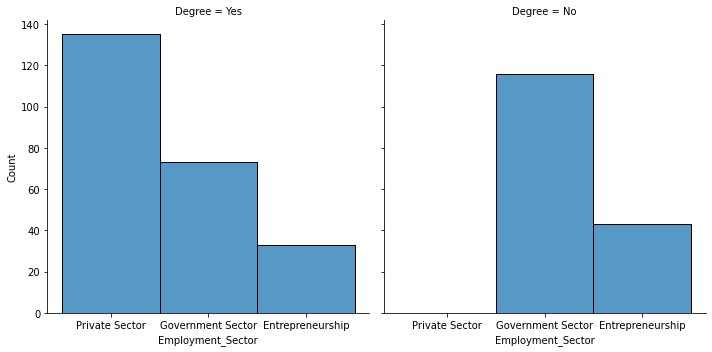

In [166]:
sns.displot(data=job_india, x='Employment_Sector', col='Degree', kde=False)
# Indian people pursuing degree focus on private sector while indian people who are not pursuing degree focus on government
# sector.

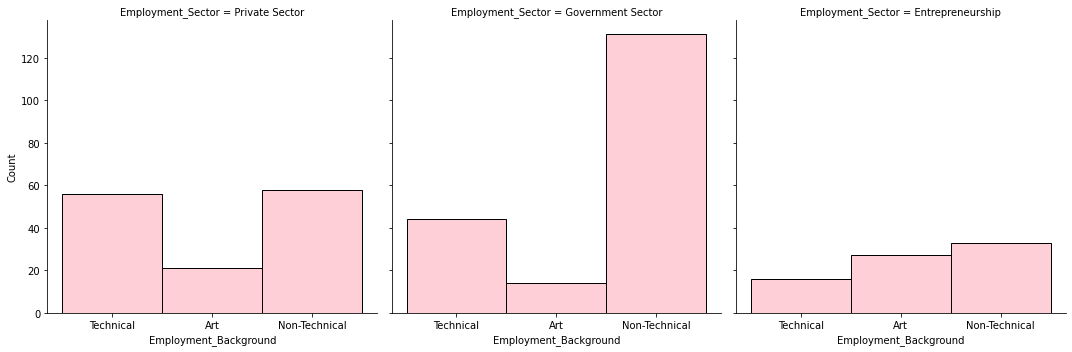

In [189]:
sns.displot(data=job_india, x='Employment_Background', col='Employment_Sector', color='pink', kde=False)
# Government Sector and entrepreneurship have a number of non-technical employment background mostly.
# Private Sector has the number of technique and non-technique equally.

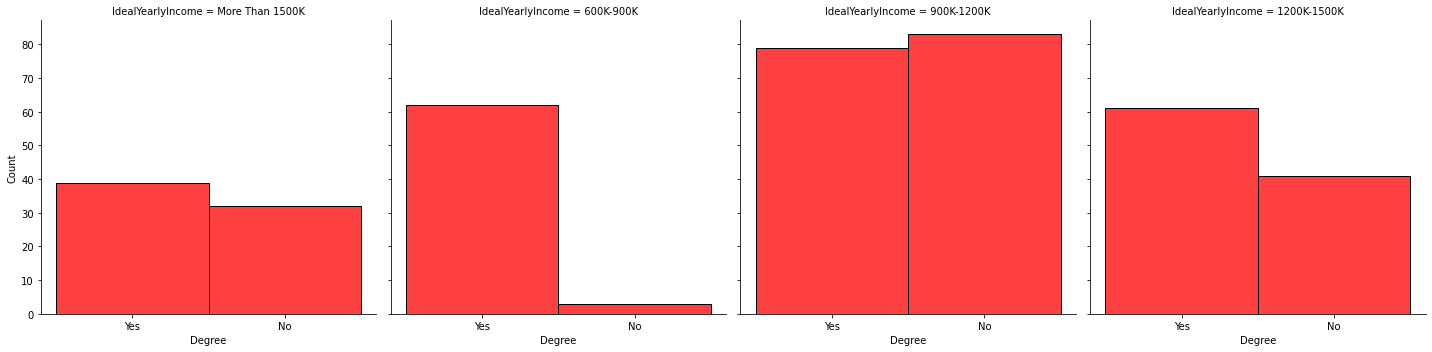

In [190]:
sns.displot(data=job_india, x='Degree', col='IdealYearlyIncome', color='red', kde=False)
# Most indian people want to receive 900K-1200K yearly income whether they have degree or not.

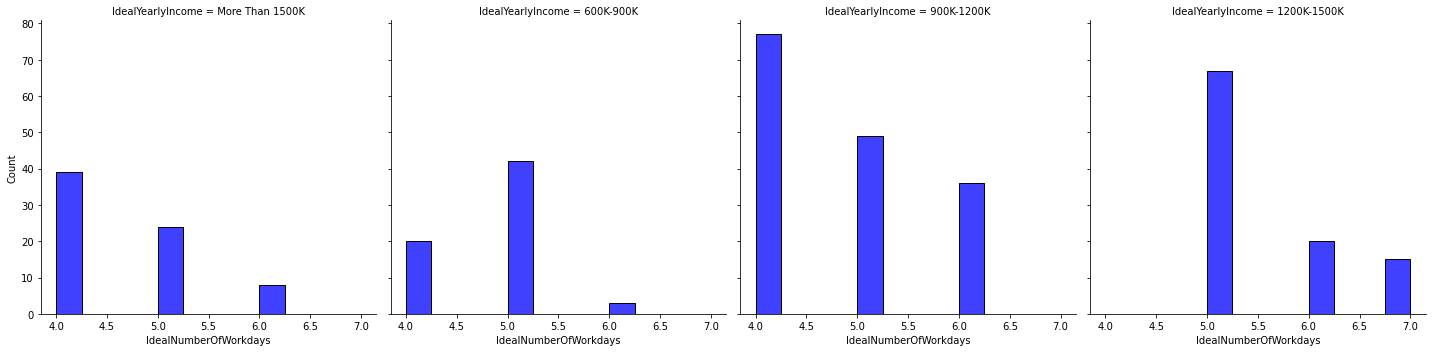

In [210]:
sns.displot(data=job_india, x='IdealNumberOfWorkdays', col='IdealYearlyIncome', color='blue', kde=False)
# Indian people desire for working 4 to 5 days per week.
# Although IdealYearlyIncome is large, indian people want to receive more money. Most is 900K-1200K

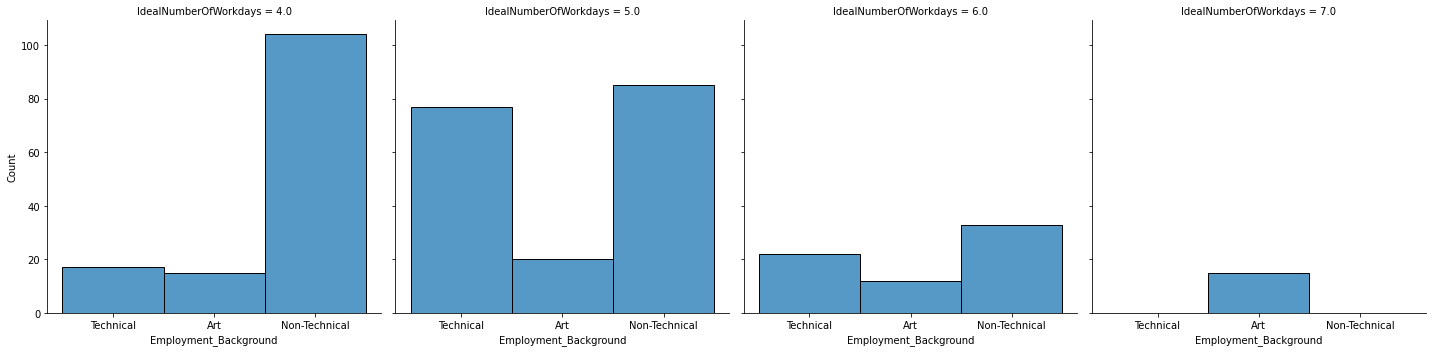

In [295]:
sns.displot(data=job_india, x='Employment_Background', col='IdealNumberOfWorkdays', kde=False)
# Students interesting in Art are willing to work all days.

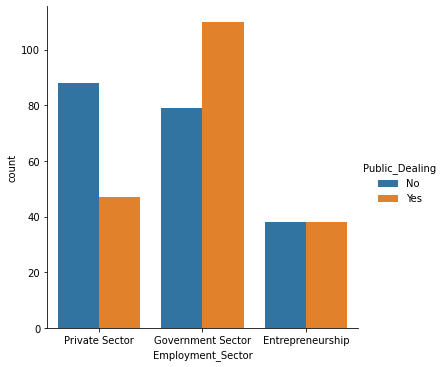

In [304]:
sns.catplot(data=job_india, x='Employment_Sector', kind='count', hue='Public_Dealing')

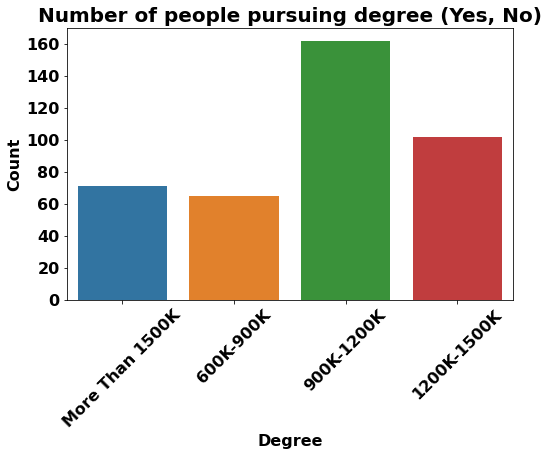

In [283]:
fig = plt.figure(figsize=(8,5))
sns.countplot(x='IdealYearlyIncome', data=job_india)
plt.title('Number of people pursuing degree (Yes, No)', fontsize=20, fontweight='bold')
plt.xlabel('Degree', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16, fontweight='bold', rotation=45)
plt.yticks(fontsize=16, fontweight='bold')
plt.show()

In [293]:
corr = job_india.apply(lambda x:x.factorize()[0]).corr()
corr

,Employment_Sector,Employment_Background,Public_Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
Employment_Sector,1.000000,0.122350,0.138990,0.477352,0.214642,0.261422
Employment_Background,0.122350,1.000000,0.479153,0.155916,-0.295354,0.016080
Public_Dealing,0.138990,0.479153,1.000000,0.117404,-0.388484,0.039801
Degree,0.477352,0.155916,0.117404,1.000000,0.202494,0.078138
IdealNumberOfWorkdays,0.214642,-0.295354,-0.388484,0.202494,1.000000,0.318459
IdealYearlyIncome,0.261422,0.016080,0.039801,0.078138,0.318459,1.000000


<AxesSubplot:>

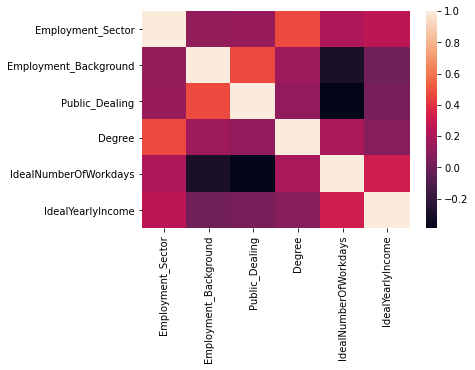

In [289]:
sns.heatmap(corr)

### Machine Learning Implementation

In [257]:
# Split training and validation set
X = job_india.drop(columns={'IdealYearlyIncome'})
y = job_india['IdealYearlyIncome']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=0)

In [258]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(360, 5)
(40, 5)
(360,)
(40,)


### List categorical columns

In [259]:
'''
    List object columns
'''
# Employment_Sector - Nominal
# Employment_Background - Nominal
# Public_Dealing - Nominal
# Degree - Nominal
# IdealNumberOfWorkdays - Ordinal
# IdealYearlyIncome - Ordinal

s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Employment_Sector', 'Employment_Background', 'Public_Dealing', 'Degree']

### Do One Hot Encoder following the Kaggle course

In [260]:
'''
    One-Hot encoder
'''

OH = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_X_train = pd.DataFrame(OH.fit_transform(X_train[object_cols]))
OH_X_valid = pd.DataFrame(OH.transform(X_valid[object_cols]))

OH_X_train.index = X_train.index
OH_X_valid.index = X_valid.index

num_X_train = X_train.drop(X_train[object_cols], axis=1)
num_X_valid = X_valid.drop(X_valid[object_cols], axis=1)
num_X = pd.concat([num_X_train, num_X_valid], axis=0)

OH_X_train = pd.concat([num_X_train, OH_X_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_X_valid], axis=1)

# Gather rows from training and validation together for cross validation
OH_X = pd.concat([OH_X_train, OH_X_valid], axis=0)
# OH_X = pd.concat([num_X, OH_X], axis=1)

### Random Forest

In [261]:
n_estimators = [2,3,4,5,10,50,100,200,400,600,800,1000]
for n_estimator in n_estimators:
    model = RandomForestClassifier(n_estimators=n_estimator, random_state=0)
    cv_rf = cross_val_score(model, OH_X, y, cv=5, scoring='recall_micro')
    print(f'N: {n_estimator} -> {cv_rf.mean()}')

N: 2 -> 0.2675
N: 3 -> 0.3125
N: 4 -> 0.305
N: 5 -> 0.2775
N: 10 -> 0.3175
N: 50 -> 0.30250000000000005
N: 100 -> 0.31000000000000005
N: 200 -> 0.32
N: 400 -> 0.30500000000000005
N: 600 -> 0.30250000000000005
N: 800 -> 0.3
N: 1000 -> 0.3075


### Decision Tree

In [262]:
max_leaf_nodes=[2,3,4,5,6,7,8,9,10]
for node in max_leaf_nodes:
    dt_model = DecisionTreeClassifier(max_leaf_nodes=node, random_state=0)
    cv_dt = cross_val_score(dt_model, OH_X, y, cv=5, scoring='recall_micro')
    print(f'Nodes: {node} -> CV: {cv_dt.mean()}')

Nodes: 2 -> CV: 0.40499999999999997
Nodes: 3 -> CV: 0.3975000000000001
Nodes: 4 -> CV: 0.3975000000000001
Nodes: 5 -> CV: 0.3775
Nodes: 6 -> CV: 0.3725
Nodes: 7 -> CV: 0.365
Nodes: 8 -> CV: 0.3675
Nodes: 9 -> CV: 0.36
Nodes: 10 -> CV: 0.35250000000000004


### Linear SVC

In [263]:
svc_linear_model = svm.SVC(kernel='linear')
cv_svc_linear = cross_val_score(svc_linear_model, OH_X, y, cv=5, scoring='recall_micro')
print(f'Linear SVC: {cv_svc_linear.mean()}')

Linear SVC: 0.40499999999999997


### RBF SVC

In [264]:
svc_rbf_model = svm.SVC(kernel='rbf')
cv_svc_rbf = cross_val_score(svc_rbf_model, OH_X, y, cv=5, scoring='recall_micro')
print(f'RBF SVC: {cv_svc_rbf.mean()}')

RBF SVC: 0.40499999999999997


### OVO SVC

In [265]:
svc_ovo = svm.SVC(decision_function_shape='ovo')
cv_svc_ovo = cross_val_score(svc_ovo, OH_X, y, cv=5, scoring='recall_micro')
print(f'OVO SVC: {cv_svc_ovo.mean()}')

OVO SVC: 0.40499999999999997


### OVR SVC

In [266]:
svc_ovr = svm.SVC(decision_function_shape='ovr')
cv_svc_ovr = cross_val_score(svc_ovr, OH_X, y, cv=5, scoring='recall_micro')
print(f'OVR SVC: {cv_svc_ovr.mean()}')

OVR SVC: 0.40499999999999997


### MLP (Multilayer Perceptron)

In [267]:
mlp_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1, 2), random_state=0)
cv_mlp = cross_val_score(mlp_model, OH_X, y, cv=5, scoring='recall_micro')
print(f'MLP: {cv_mlp.mean()}')

MLP: 0.40499999999999997


In [49]:
y_train.head()

336     600K-900K
64     900K-1200K
55     900K-1200K
106    900K-1200K
300    900K-1200K
Name: IdealYearlyIncome, dtype: object

In [212]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=2, random_state=0)

In [213]:
dt_model.fit(OH_X_train, y_train)
dt_model.predict(OH_X_valid)

array(['900K-1200K', '900K-1200K', '1200K-1500K', '1200K-1500K',
       '900K-1200K', '1200K-1500K', '900K-1200K', '1200K-1500K',
       '1200K-1500K', '1200K-1500K', '1200K-1500K', '1200K-1500K',
       '900K-1200K', '900K-1200K', '1200K-1500K', '1200K-1500K',
       '1200K-1500K', '1200K-1500K', '1200K-1500K', '900K-1200K',
       '900K-1200K', '900K-1200K', '1200K-1500K', '900K-1200K',
       '1200K-1500K', '1200K-1500K', '1200K-1500K', '1200K-1500K',
       '1200K-1500K', '1200K-1500K', '900K-1200K', '1200K-1500K',
       '900K-1200K', '900K-1200K', '1200K-1500K', '1200K-1500K',
       '1200K-1500K', '1200K-1500K', '900K-1200K', '1200K-1500K',
       '900K-1200K', '1200K-1500K', '900K-1200K', '900K-1200K',
       '900K-1200K', '1200K-1500K', '1200K-1500K', '900K-1200K',
       '1200K-1500K', '1200K-1500K', '1200K-1500K', '1200K-1500K',
       '1200K-1500K', '1200K-1500K', '1200K-1500K', '900K-1200K',
       '1200K-1500K', '1200K-1500K', '1200K-1500K', '1200K-1500K',
       '1200K-1

In [214]:
correct = y_valid
prediction = dt_model.predict(OH_X_valid)

result = pd.DataFrame({'Correct': correct, 'Prediction': prediction})

In [215]:
false_prediction = result[result['Correct'] != result['Prediction']].shape[0]
correct_prediction = result[result['Correct'] == result['Prediction']].shape[0]

In [216]:
print(f'False prediction: {false_prediction}')
print(f'Correct prediction: {correct_prediction}')

False prediction: 55
Correct prediction: 25


In [148]:
result

,Correct,Prediction
132,More Than 1500K,900K-1200K
309,600K-900K,900K-1200K
341,More Than 1500K,1200K-1500K
196,1200K-1500K,1200K-1500K
246,900K-1200K,900K-1200K
...,...,...
14,More Than 1500K,900K-1200K
363,600K-900K,1200K-1500K
304,900K-1200K,900K-1200K
361,900K-1200K,1200K-1500K


In [256]:
dt_model.predict([[5, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]])

array(['1200K-1500K'], dtype=object)